# Wine Quaity DataSet Classification


## Data Set Information:

* Source: https://www.kaggle.com/rajyellow46/wine-quality

The dataset was downloaded from the UCI Machine Learning Repository.

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Two datasets were combined and few values were randomly removed.

## Data Set Information:

* For more information, read [Cortez et al., 2009].

### Input variables (based on physicochemical tests):
1 - fixed acidity  
2 - volatile acidity  
3 - citric acid  
4 - residual sugar  
5 - chlorides  
6 - free sulfur dioxide   
7 - total sulfur dioxide  
8 - density   
9 - pH  
10 - sulphates  
11 - alcohol 

### Output variable (based on sensory data):
12 - quality (score between 0 and 10)

Acknowledgements:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

# The summary of analysis:


## Aim/Purpose

* The idea is create a machine learning model to:
    - Data Exploration/Visualization
        - Understand structure of the data.
    - Predict the quality of wine based on 11 inputs.
    - Determine factors which have the higher probability to predict the quality.
        - Reduce the dimension of variables. (Feature engineering)
    - Determine machine learning model for best classifying the wines.
    
    
## The flaw of analysis:

* We missed out problem dealing with imbalanced class.
    - There's more normal quality wines than poor/exellent ones.
    - Can be done with SMOTE (Synthetic Minority Oversampling Technique)
    - Reference: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
    - Add in another algorithm to oversample minority classs by duplication.

## Data Exploration:

* The charts are in the notebook.
* Found mainly three variables affecting the result of predicting outcomes:
    - Alcohol (Positive correlation with quality)
    - Volatile Acidity (Negaitve correlation with quality)
    

## Model:

* We used **XGboost algorithm** with SHAP explainer for features.
* Also we tried out several different algorithm such as CART and random forest.
* Reference: https://xgboost.readthedocs.io/en/latest/tutorials/model.html

### Explanation
* XGBoost stands for “Extreme Gradient Boosting”, where the term “Gradient Boosting” originates from the paper Greedy Function Approximation: A Gradient Boosting Machine, by Friedman. This is a tutorial on gradient boosted trees, and most of the content is based on https://homes.cs.washington.edu/~tqchen/pdf/BoostedTree.pdf by Tianqi Chen, the original author of XGBoost.
* One of the **supervised learning algorithm**.
* The boosted tree model is constructed, sequentially where each new tree attempts to model and correct for the errors made by the sequence of previous trees.
* Quickly, the model reaches a point of diminishing returns.

### Advantage:

* https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
* 1. Regularization:
    - Mathematically, machine learning model includes an **objective function** comprised of loss(Mean Square Error) + penalty regularization term, optimizing by reducing the objetive function.
    - It introduces a cost term for bringing in more features with the objective function. 
    - Hence, it tries to push the coefficients for many variables to zero and hence reduce cost term.
    - **Reference:**: https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c
    - L1 regulartization: Lasso Regression
        - Absolute magnitude of coefficients of variables.
    - L2 regulartization: Ridge Regression
        - Squared magnitude of coefficients of variables.
        
* 2. Parallel Processing:
    - XGBoost implements parallel processing and is blazingly faster as compared to GBM.
    
* 3. High Flexibility
    - Customization on optimization objectives and evaluation criteria.
    
* 4. Handling Missing Values
    - XGBoost has an in-built routine to handle missing values.
     
* 5. Tree Pruning:
    - A GBM would stop splitting a node when it encounters a negative loss in the split. 
    - XGBoost on the other hand make splits upto the max_depth specified and then start pruning the tree backwards and remove splits beyond which there is no positive gain.
    
* 6. Built-in Cross-Validation

* 7. Continue on Existing Model
     - User can start training an XGBoost model from its last iteration of previous run. 
     - This can be of significant advantage in certain specific applications.    
       

### Main parameters:
* **Reference**: https://xgboost.readthedocs.io/en/latest/parameter.html
* 1. Learning Rate:
    - Variable: **learning_rate**
    - Prevent overfitting.
    - Slow down the learning in the gradient boosting model is to apply a weighting factor for the corrections by new trees when added to the model.
     
* 2. Number of Trees:
    - Variable: **n_estimators**.
    - Optimize the number of trees will be efficiently improve training time, as the loss function could be capped for further increase of trees.
    
* 3. Depth of Trees:
    - Variable: **max_depth**.
    - Shallow trees are expected to have poor performance because they capture few details of the problem and are generally referred to as weak learners.
    - Deeper trees generally capture too many details of the problem and overfit the training dataset, limiting the ability to make good predictions on new data.
    - Pruning of trees basically in short.
    
* 4. Minimum sum of instance weight (hessian) needed in a child. 
    - Variable: **min_child_weight**.
    - **If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning**. 
    - In linear regression task, this simply corresponds to minimum number of instances needed to be in each node. 
    - The larger min_child_weight is, the more conservative the algorithm will be.
      
* 5. Gamma
    - Variable: **gamma**
    - Minimum loss reduction required to make a further partition on a leaf node of the tree. 
    - The larger gamma is, the more conservative the algorithm will be.
    
* 6. Subsample of trees:
    - Variable: **subsample**
    - Subsample ratio (Rows of data) of the training instances. 
    - Prevent overfitting.
    - Occur once in every boosting iteration.
* 7. Objective:
    - Variable: **objective**
    - Specify the learning task and the corresponding learning objective. 
    - Mainly, for two class classification: 
        - **binary:logistic**
    - And for multiple class classification:
        - **multi:softmax**

In [1]:
import matplotlib.pyplot as plt
from datetime import timedelta
from matplotlib import pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier, plot_importance
from scipy.stats import skew, norm, probplot, boxcox, f_oneway
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ClassPredictionError, ROCAUC
import numpy as np
import pandas as pd
import matplotlib
import scipy
import shap
import squarify
import seaborn as sns
import xgboost as xgb

shap.initjs()
np.random.seed(0)


C:\Users\moses\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# Reclassification of Quality

* We further classify the wine to **three-class**.
    - "<5:: Low
    - ">8": High
    - Else: Medium 

In [2]:
dr_workplace = 'C:\\Users\\moses\\OneDrive\\Documents\\machine learning\\kaggle_winequality\\'
df = pd.read_csv(dr_workplace + 'winequalityN.csv') # Load the data
df['quality_label'] = df.quality.apply(lambda q: 'low' if q <= 5 else 'medium' if q <= 7 else 'high')
class_tp = LabelEncoder()
y_tp = class_tp.fit_transform(df.type.values) # 1 - White; 0 - Red
df['color'] = y_tp
class_ql = {'low':0, 'medium': 1, 'high': 2}

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378,0.753886
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


# Distribution of Quality Label

* We have imbalanced dataset where:
    - 60.3% is medium quality
    - 36.7% is low quality.
    - and 3% is high quality.

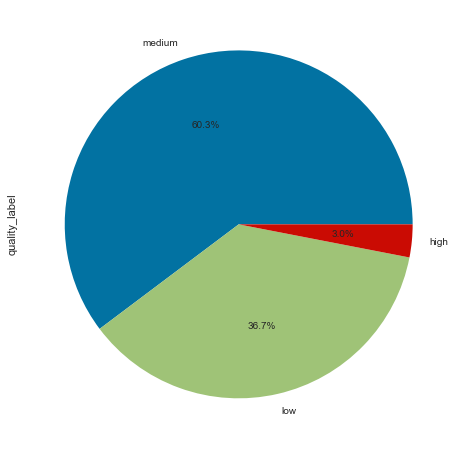

In [4]:
plt.figure(1, figsize=(17,8))
df['quality_label'].value_counts().plot.pie(autopct="%1.1f%%")

In [5]:
def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape:', df.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis], axis = 1)

    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=False)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str

# Handling missing value:

* There're several missing values spotted.
* For each numerical variable, we used sorted mean to fill in the missing value.

In [6]:
categorical_columns = []
numeric_columns = []
for c in df.columns:
    if df[c].map(type).eq(str).any(): #check if there are any strings in column
        categorical_columns.append(c)
    else:
        numeric_columns.append(c)

#create two DataFrames, one for each data type
df_numeric = df[numeric_columns]
df_categorical = pd.DataFrame(df[categorical_columns])


#Apply imputer to numeric columns
imp = SimpleImputer(missing_values = np.nan, strategy='mean')
df_numeric = pd.DataFrame(imp.fit_transform(df_numeric), 
                          columns = df_numeric.columns) 

#We don't need for categorical

#Join the two masked dataframes back together
df_joined = pd.concat([df_numeric, df_categorical], axis = 1)

In [7]:
df_joined.isnull().sum().sort_values(ascending = False)

quality_label           0
type                    0
color                   0
quality                 0
alcohol                 0
sulphates               0
pH                      0
density                 0
total sulfur dioxide    0
free sulfur dioxide     0
chlorides               0
residual sugar          0
citric acid             0
volatile acidity        0
fixed acidity           0
dtype: int64

# Histogram of Wine Type/Quality

* The dataset is imbalanced where we have **more samples of white wine than red**.
* Nevertheless, we have more normal quality in either type of wine.  

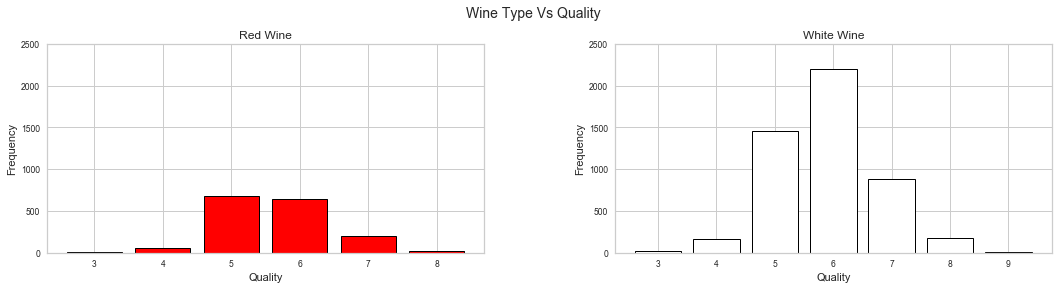

In [8]:
fig = plt.figure(figsize = (18, 4))
title = fig.suptitle("Wine Type Vs Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

for i in range(0, 1 + 1, 1):
    title_list = ['Red Wine', 'White Wine']
    type_list = ['red', 'white']
    ax = fig.add_subplot(1, 2, i + 1)
    ax.set_title(title_list[i])
    ax.set_xlabel("Quality")
    ax.set_ylabel("Frequency") 
    rw_q = df_joined.quality[df_joined.type == type_list[i]].value_counts()
    rw_q = (list(rw_q.index), list(rw_q.values))
    ax.set_ylim([0, 2500])
    ax.tick_params(axis='both', which='major', labelsize=8.5)
    bar1 = ax.bar(rw_q[0], rw_q[1], color = type_list[i], edgecolor='black', linewidth=1)


# Further Understanding of Physicochemical Variable

* Let's have a quick glance of numerical statistics of:
    - Red/White wines splits
    - Quality Type splits
 
## Summary

### Fixed  Acidity:

* Reference: https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity  
* The predominant fixed acids found in wines are tartaric, malic, citric, and succinic. 

### Volatile  Acidity:

* Reference: https://waterhouse.ucdavis.edu/whats-in-wine/volatile-acidity 
* Volatile acidity refers to the steam distillable acids present in wine, primarily acetic acid but also lactic, formic, butyric, and propionic acids. 
* The amount of volatile acidity found in sound grapes is negligible.  It is a byproduct of microbial metabolism.
* Excess of volatile acids are undesirable and lead to unpleasant flavor. 

### Citric  Acid:
* This is one of the fixed acids which gives a wine its freshness. 
* Usually most of it is consumed during the fermentation process and sometimes it is added separately to give the wine more freshness.  

### Residual Sugar/Sweetness:
* It's the natural sugar from grapes which remains after the fermentation process stops.  

### Chlorides:
* It's the major contributor to **saltiness** in wine.
* **Highly depending on origin**
    - Reference: https://www.scielo.br/scielo.php?pid=S0101-20612015000100095&script=sci_arttext&tlng=en.
    - Australia and Argentina presented the highest levels of chloride 
    - Syrah variety presented the highest concentration of such ion.

### Sulfur dioxide:
 * This is mainly added to kill harmful bacteria and preserve quality and freshness. 
 * There are usually legal limits for sulfur levels in wines and excess of it can even kill good yeast and give out undesirable odour.
 
### Density:
 * It is a comparison of the weight of a specific volume of wine to an equivalent volume of water. 
 
### pH:
* Also known as the potential of hydrogen.
* A numeric scale to specify the acidity or basicity the wine. 
* With a pH less than 7 are acidic, while solutions with a pH greater than 7 are basic(alkaline). With a pH of 7, pure water is neutral. 
* Most wines have a pH between 2.9 and 3.9 and are therefore acidic.

### Alcohol 

* It is formed as a result of yeast converting sugar during the fermentation process. 
* The percentage of alcohol can vary from wine to wine. 
* It is interpreted  using many **different taste receptors** which is why it can taste differently, such as:
    - Bitter, sweet, spicy, and oily all at once. 
* Your genetics actually plays a role in how bitter or sweet alcohol tastes. 
* Alcohol Characteristics:
    - Wines with higher alcohol tend to taste bolder and more oily
    - Wines with lower alcohol tend to taste lighter-bodied

In [9]:
subset_attributes = df_joined.columns
df_red = round(df_joined.loc[df_joined.type == 'red', subset_attributes].describe(),2)
df_white = round(df_joined.loc[df_joined.type == 'white', subset_attributes].describe(),2)
pd.concat([df_red, df_white], axis=0, keys=['Red Wine Statistics', 'White Wine Statistics']).T

Red Wine Statistics                                    \
                                   count   mean    std   min    25%    50%   
fixed acidity                     1599.0   8.32   1.74  4.60   7.10   7.90   
volatile acidity                  1599.0   0.53   0.18  0.12   0.39   0.52   
citric acid                       1599.0   0.27   0.19  0.00   0.09   0.26   
residual sugar                    1599.0   2.54   1.41  0.90   1.90   2.20   
chlorides                         1599.0   0.09   0.05  0.01   0.07   0.08   
free sulfur dioxide               1599.0  15.87  10.46  1.00   7.00  14.00   
total sulfur dioxide              1599.0  46.47  32.90  6.00  22.00  38.00   
density                           1599.0   1.00   0.00  0.99   1.00   1.00   
pH                                1599.0   3.31   0.15  2.74   3.21   3.31   
sulphates                         1599.0   0.66   0.17  0.33   0.55   0.62   
alcohol                           1599.0  10.42   1.07  8.40   9.50  10.20   
quality                           1599.0   5.64   0.81  3.00   5.00   6.00   
color                             1599.0   0.00   0.00  0.00   0.00   0.00   

                                    White Wine Statistics                 \
                        75%     max                 count    mean    std   
fixed acidity          9.20   15.90                4898.0    6.86   0.84   
volatile acidity       0.64    1.58                4898.0    0.28   0.10   
citric acid            0.42    1.00                4898.0    0.33   0.12   
residual sugar         2.60   15.50                4898.0    6.39   5.07   
chlorides              0.09    0.61                4898.0    0.05   0.02   
free sulfur dioxide   21.00   72.00                4898.0   35.31  17.01   
total sulfur dioxide  62.00  289.00                4898.0  138.36  42.50   
density                1.00    1.00                4898.0    0.99   0.00   
pH                     3.40    4.01                4898.0    3.19   0.15   
sulphates              0.73    2.00                4898.0    0.49   0.11   
alcohol               11.10   14.90                4898.0   10.51   1.23   
quality                6.00    8.00                4898.0    5.88   0.89   
color                  0.00    0.00                4898.0    1.00   0.00   

                                                            
                       min     25%     50%     75%     max  
fixed acidity         3.80    6.30    6.80    7.30   14.20  
volatile acidity      0.08    0.21    0.26    0.32    1.10  
citric acid           0.00    0.27    0.32    0.39    1.66  
residual sugar        0.60    1.70    5.20    9.90   65.80  
chlorides             0.01    0.04    0.04    0.05    0.35  
free sulfur dioxide   2.00   23.00   34.00   46.00  289.00  
total sulfur dioxide  9.00  108.00  134.00  167.00  440.00  
density               0.99    0.99    0.99    1.00    1.04  
pH                    2.72    3.09    3.18    3.28    3.82  
sulphates             0.22    0.41    0.47    0.55    1.08  
alcohol               8.00    9.50   10.40   11.40   14.20  
quality               3.00    5.00    6.00    6.00    9.00  
color                 1.00    1.00    1.00    1.00    1.00

# From above:

* Red wine is more acidic than white, by referringto acidity and pH
* Red wine has about twice chlorides than white.
* Alcohol content and quality for both is similiar
* The citric acid is more present in white than red wines.

In [10]:
pd.options.display.max_columns = 30
df_low = round(df_joined[df_joined['quality_label'] == 'low'][subset_attributes].describe(),2).T
df_low = pd.DataFrame(df_low["mean"])
df_medium = round(df_joined[df_joined['quality_label'] == 'medium'][subset_attributes].describe(),2).T
df_medium = pd.DataFrame(df_medium["mean"])
df_high = round(df_joined[df_joined['quality_label'] == 'high'][subset_attributes].describe(),2).T
df_high = pd.DataFrame(df_high["mean"])
pd.concat([df_low, df_medium, df_high], 
          axis=1, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine'])

,Low Quality Wine,Medium Quality Wine,High Quality Wine
,mean,mean,mean
fixed acidity,7.33,7.16,6.86
volatile acidity,0.40,0.31,0.29
citric acid,0.30,0.33,0.33
residual sugar,5.65,5.33,5.35
chlorides,0.06,0.05,0.04
free sulfur dioxide,29.48,30.96,34.51
total sulfur dioxide,119.28,113.51,117.48
density,1.00,0.99,0.99
pH,3.21,3.22,3.23


# From mean statistic above, better wine should have:

* More:
    - Alcohol content, free sulfur dioxide.
* Less:
    -  Fixed and volatile acidity, chlroides(saltines) content.

# Correlation Matrix

* We could roughly understand that model weights higher alcohol content as a measure of better quality of wine.
* Proabably volatile acidity as well.

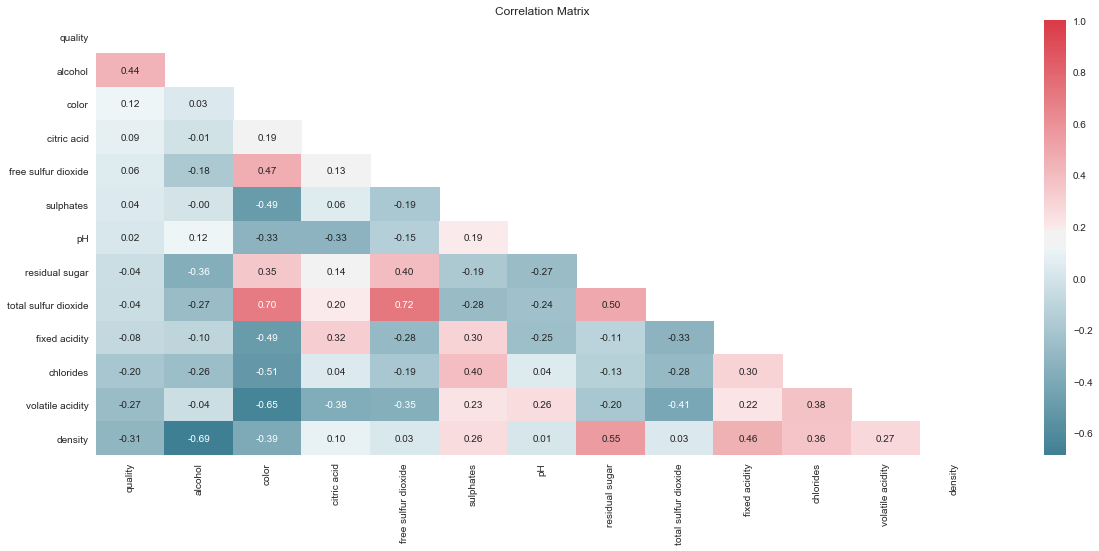

In [11]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))
corr = df_joined.corr()
ax.set_title("Correlation Matrix")
top_corr_cols = corr.quality.sort_values(ascending=False).keys() 
top_corr = corr.loc[top_corr_cols, top_corr_cols]
dropSelf = np.zeros_like(top_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, 
            fmt=".2f", mask=dropSelf, ax = ax)

# Violinplot of possible features

* Alcohol
* Density
* Volatile Acidity
* Chlorides

* Once proven:
    - High quality of wine has higher alcohol and less volatile acidity

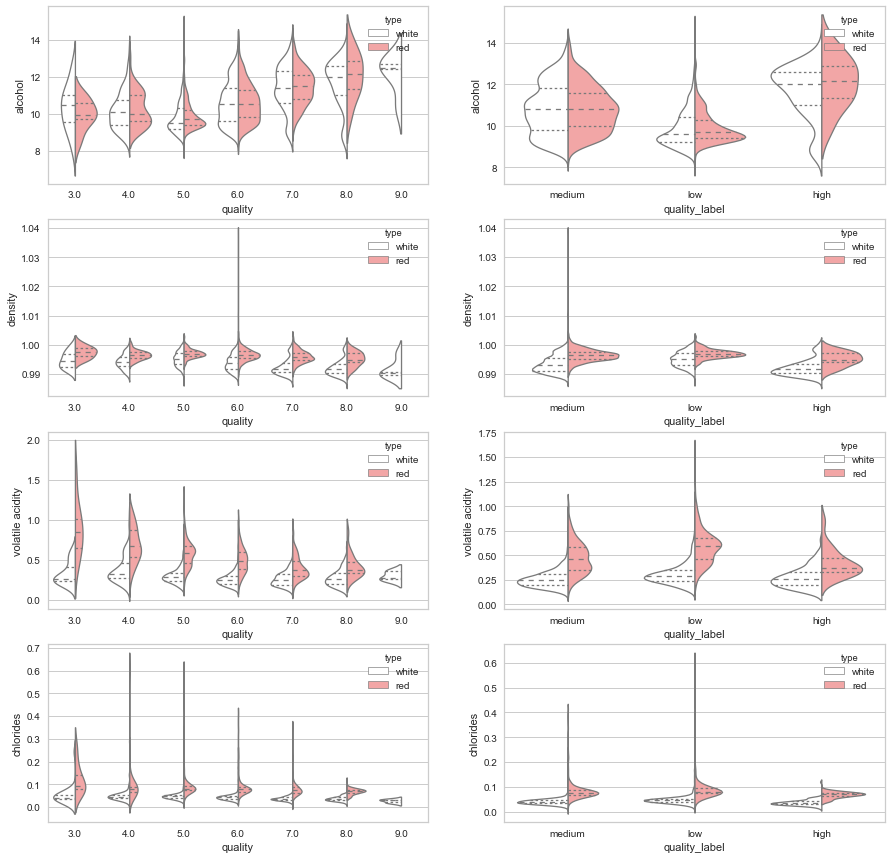

In [12]:
f, axes = plt.subplots(4, 2, figsize = (15, 15))
fig.subplots_adjust(top=0.85, wspace=0.3)

for i in range(0, 4, 1):
    title_list = ['Wine Type - Quality - Alcohol', 'Wine Type - Quality - Density', 
                  'Wine Type - Quality - Volatile Acidity', 'Wine Type - Quality - Chlorides']
    y_list = ['alcohol', 'density', 'volatile acidity', 'chlorides']
    #y_label_list = ['Alcohol', 'Densiy', 'Volatile Acidity', 'Chlorides']
    #f.suptitle(title_list[i], fontsize = 14)
    sns.violinplot(x = 'quality', y = y_list[i], hue='type', 
                   data = df_joined, split=True, inner='quart', linewidth=1.3,
               palette={'red': '#FF9999', 'white': 'white'}, ax = axes[i, 0])
    #ax[i, 0].set_xlabel("Wine Quality", size = 12, alpha=0.8)
    #ax[i, 0].set_ylabel(y_label_list[i], size = 12, alpha=0.8)

    sns.violinplot(x = 'quality_label', y = y_list[i], hue='type', 
                   data = df_joined, split=True, inner='quart', linewidth=1.3,
                   palette={'red': '#FF9999', 'white': 'white'}, ax = axes[i, 1])
    #ax[i, 1].set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
    #ax[i, 1].set_ylabel(y_label_list[i], size = 12, alpha=0.8)

# Box-Cox Transformation

* Box-Cox transformation is one of the ways to transform **highly skewed** or non-normal variables to normal.  
* Model bias and spurious interactions: 
    - Resulting in a very complex model with many spurious and unrealistic interactions.
* Normality is an important assumption for many statistical techniques: 
    - Such as t-tests and analysis of variance (ANOVA). 
* We brought 6 highly skewed variables back to normal in the following:

In [13]:
numeric_features = list(df_joined.dtypes[(df_joined.dtypes != "str") & (df_joined.dtypes !='object')].index)
numeric_features.remove('color')
skewed_features = df_joined[numeric_features].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)

#compute skewness
skewness = pd.DataFrame({'skew' :skewed_features})   

# Get only higest skewed features
skewness = skewness[abs(skewness) > 0.7]
skewness = skewness.dropna()
print ("There are {} highly skewed numerical features to be box-cox transformed".format(skewness.shape[0]))

l_opt = {}

for feat in skewness.index:
    df_joined[feat], l_opt[feat] = boxcox((df_joined[feat]+1))

skewed_features2 = df_joined[skewness.index].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)

#compute skewness
skewness2 = pd.DataFrame({'skew_new' :skewed_features2})   
display(pd.concat([skewness, skewness2], axis=1).sort_values(by=['skew'], ascending=False))

There are 6 highly skewed numerical features to be box-cox transformed


,skew,skew_new
chlorides,5.399433,0.188574
sulphates,1.798605,0.009936
fixed acidity,1.723733,-0.063260
volatile acidity,1.496087,0.112905
residual sugar,1.434889,0.136183
free sulfur dioxide,1.219784,-0.036864


# Machine Learning Algorithm:

* Finally, we come to a step to checkout **machine learning model** to nicely predict the quality of wines.
* We tested on:
    - Logistic regression
    - Linear Discrimant Analysis
    - K Nearest Neighbor 
    - Decision Tree (CART)
    - Bagging method: Random Forest
    - Boosting method: AdaBoost and XGBoost
    - Support Vector Classifier

In [14]:
# The target variable is 'quality'.
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 
                 'residual sugar','chlorides', 'free sulfur dioxide', 
                 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']
class_ql = {'low':0, 'medium': 1, 'high': 2}
df_joined['quality_label_class']= df_joined.quality_label.map({'low':0, 'medium': 1, 'high': 2})

y_ql = df_joined.quality_label.map(class_ql)

y = df_joined['quality_label_class']
X = df_joined[feature_names]
# Split the data into train and test data:
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size = 0.2)

In [15]:
xgb = XGBClassifier()
logreg2 = LogisticRegressionCV()
knn = KNeighborsClassifier()
svcl = SVC()
adb = AdaBoostClassifier()
dtclf = DecisionTreeClassifier()
rfclf = RandomForestClassifier()

#Prepare the config for cross validation test harness
seed = 100

#Prepare the model
models = []
models.append(('Log-Reg', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('XGB', XGBClassifier()))
models.append(('KNN', KNeighborsClassifier(5)))
models.append(('DT', DecisionTreeClassifier(max_depth = 5))) #Inludes pruning at 5
models.append(('RF', RandomForestClassifier(max_depth = 6, random_state=0, n_estimators=10)))
models.append(('ADA', AdaBoostClassifier()))
models.append(('SVC-scale', SVC(gamma = 'scale')))

#Evaluate each model
results = []
names = []
for name, model, in models:
    kfold = StratifiedKFold(n_splits = 10)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Log-Reg: 0.657498 (0.017873)
LDA: 0.716561 (0.014237)
XGB: 0.794113 (0.015494)
KNN: 0.677509 (0.016223)
DT: 0.705013 (0.016220)
RF: 0.732148 (0.011420)
ADA: 0.689053 (0.012151)
SVC-scale: 0.604580 (0.005404)


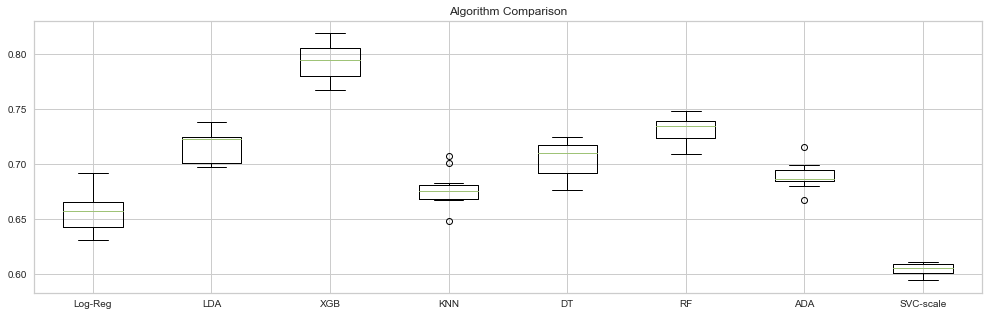

In [16]:
# Compare Algorithms
plt.figure(figsize=(17,5))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

# XGBoost

* We skipped printing out the hyperparameters tuning due to long printout, but here's the best parameters tuned
* {'xgb__max_depth': 15, 'xgb__n_estimators': 20, 'xgb__subsample': 1}

In [17]:
# from sklearn.base import BaseEstimator
# from sklearn.model_selection import train_test_split
# from xgboost import XGBRegressor, XGBClassifier

# class XGBoostWithEarlyStop(BaseEstimator):
#     def __init__(self, early_stopping_rounds=5, test_size=0.1, 
#                  eval_metric='mae', **estimator_params):
#         self.early_stopping_rounds = early_stopping_rounds
#         self.test_size = test_size
#         self.eval_metric=eval_metric='mae'        
#         if self.estimator is not None:
#             self.set_params(**estimator_params)

#     def set_params(self, **params):
#         return self.estimator.set_params(**params)

#     def get_params(self, **params):
#         return self.estimator.get_params()

#     def fit(self, X, y):
#         x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=self.test_size)
#         self.estimator.fit(x_train, y_train, 
#                            early_stopping_rounds=self.early_stopping_rounds, 
#                            eval_metric=self.eval_metric, eval_set=[(x_val, y_val)])
#         return self

#     def predict(self, X):
#         return self.estimator.predict(X)

# class XGBoostRegressorWithEarlyStop(XGBoostWithEarlyStop):
#     def __init__(self, *args, **kwargs):
#         self.estimator = XGBRegressor()
#         super(XGBoostRegressorWithEarlyStop, self).__init__(*args, **kwargs)

# class XGBoostClassifierWithEarlyStop(XGBoostWithEarlyStop):
#     def __init__(self, *args, **kwargs):
#         self.estimator = XGBClassifier()
#         super(XGBoostClassifierWithEarlyStop, self).__init__(*args, **kwargs)

In [18]:
# # The target variable is 'quality'.
# feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 
#                  'residual sugar','chlorides', 'free sulfur dioxide', 
#                  'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']
# y = df_joined['quality_label_class']
# X = df_joined[feature_names]
# # Split the data into train and test data:
# X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size = 0.1)

# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV

# pipe = Pipeline([
#     ('xgb', XGBoostRegressorWithEarlyStop())
# ])

# param_grid = {
#     'xgb__n_estimators': [10, 20, 30, 50],
#     'xgb__subsample' : [0.5 , 0.8, 0.9, 1],
#     'xgb__max_depth' : [5, 8, 10, 12, 15]
# }

# grid = GridSearchCV(pipe, param_grid, scoring='neg_mean_absolute_error')
# grid.fit(X_train,y_train)
# print(grid.best_params_)

In [19]:
# Make predictions on validation dataset
# The target variable is 'quality'.
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid',
                 'chlorides', 'free sulfur dioxide', 
                 'density','pH', 'sulphates', 'alcohol']

#feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 
#                 'residual sugar','chlorides', 'free sulfur dioxide', 
#                 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']
y = df_joined['quality_label_class']
X = df_joined[feature_names]

# Split the data into train and test data:
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size = 0.2)
model = XGBClassifier(learning_rate =0.1, n_estimators = 50, max_depth=15,
                      min_child_weight=1, gamma=0, subsample=1, colsample_bytree=0.4,
                      objective= 'multi:softprob')

model.fit(X_train, y_train)
predictions = model.predict(X_test)


# Evaluate predictions
print('Accuracy of XBG Classifier Model on test set: {:.2%}'
     .format(accuracy_score(y_test, predictions)))
print('*' * 60)
print('Confusion Matrix')
print(confusion_matrix(y_test, predictions))
print('*' * 60)
print('Classification Report')
print(classification_report(y_test, predictions))

# XGB gives 92.25% accuracy in predicting the CLVCluster after 7 months.
# Extra tuning maybe be needed if we wish to achieve higher accuracy!
#https://stackabuse.com/understanding-roc-curves-with-python/

Accuracy of XBG Classifier Model on test set: 79.54%
************************************************************
Confusion Matrix
[[321 144   0]
 [ 91 699   1]
 [  0  30  14]]
************************************************************
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       465
           1       0.80      0.88      0.84       791
           2       0.93      0.32      0.47        44

    accuracy                           0.80      1300
   macro avg       0.84      0.63      0.68      1300
weighted avg       0.80      0.80      0.79      1300



# Further explanation using SHAP

* Reference: **(Explain Your Model with the SHAP Values)** - https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d
* Stands for SHapley Additive exPlanations.
* **SHAP is the average of the marginal contributions across all permutations.**
* Benefit includes:
    - Variable Importance Plot — Global Interpretability
    -  SHAP Dependence Plot — Between features


In [20]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")

In [21]:
# The model has been defined as xgboost model in previous tab.
# Create Shap Explainer for train and test dataset:
model = XGBClassifier(learning_rate =0.1, n_estimators = 50, max_depth=15,
                      min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.4,
                      objective= 'multi:softprob')

model.fit(X_train, y_train)

X_test_ = pd.DataFrame(X_test, columns = feature_names)
X_test_ = shap.sample(X_test_, 100)
test_explainer  = shap.KernelExplainer(model.predict, X_test_)
test_shap_values  = test_explainer.shap_values(X_test_)

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


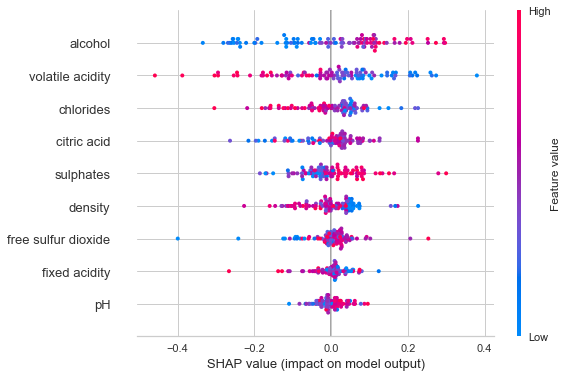

In [22]:
#Plot test dataset only due to huge dataset.
shap.summary_plot(test_shap_values, X_test_, plot_size = 0.5)

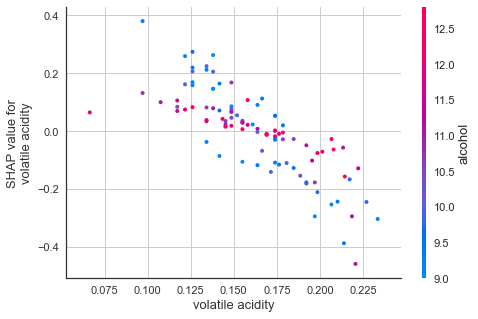

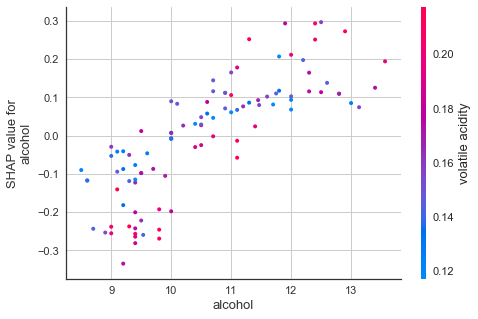

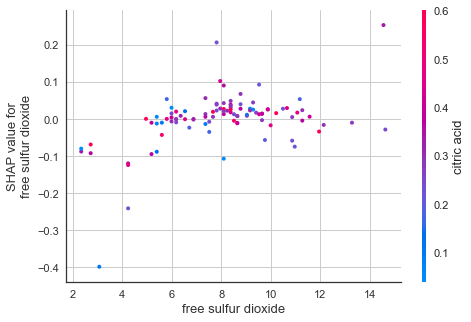

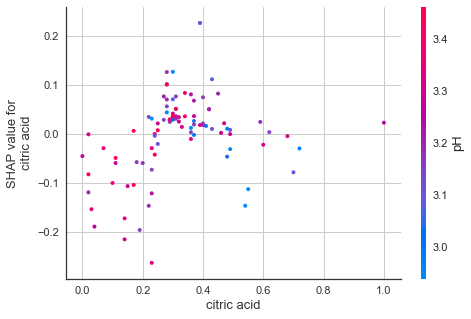

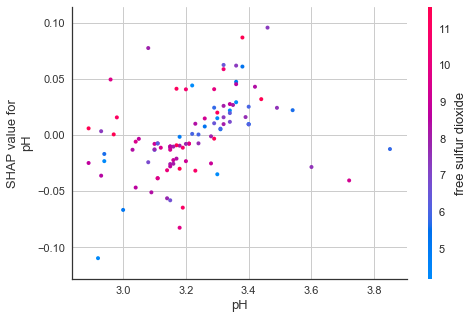

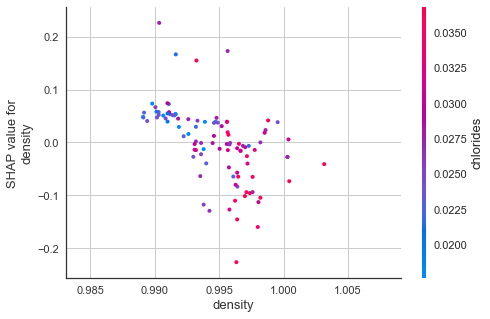

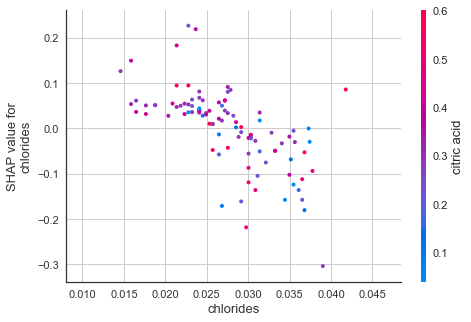

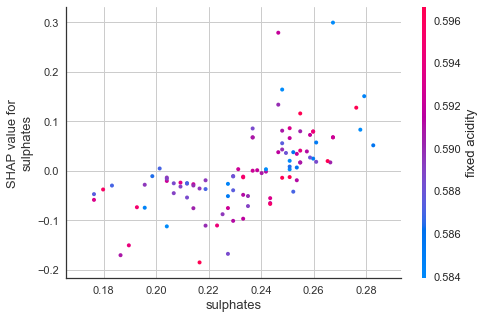

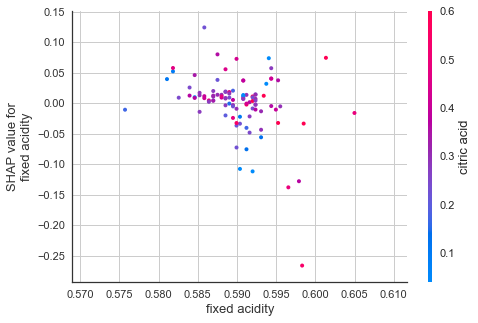

In [23]:
avg_feature = pd.DataFrame(test_shap_values, columns = feature_names).mean()
avg_feature = pd.DataFrame(avg_feature.sort_values(ascending = False)).index
for fn in avg_feature:
    shap.dependence_plot(fn, test_shap_values, X_test_)

# Redefine X_train
* Mainly to compare each variable with average values in training dataset

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
pd.DataFrame(X_train.mean())

,0
fixed acidity,0.590843
volatile acidity,0.164431
citric acid,0.319923
chlorides,0.028846
free sulfur dioxide,7.608749
density,0.994685
pH,3.217101
sulphates,0.232603
alcohol,10.502437


# Single Observation SHAP Values:
 
* For this specific example:
    - The class is **medium**.
    - **Alcohol content** is 10.7, which is **larger than average** value of 10.5, hence **positively** contribute to quality.
    - **Citric acid content** is 0.34 which is **larger to average** of 0.32, hence **positively** contribute to quality.
    - **Volatile acidity** is 0.61 which is **lower than average** of 0.1641, hence **positively** contribute to quality.

In [25]:
# plot the SHAP values for up to 10th observation 
shap.force_plot(test_explainer.expected_value, test_shap_values[10], X_test_.iloc[10])

In [26]:
#The collective force plot
shap.force_plot(test_explainer.expected_value, test_shap_values, X_test_)

# SHAP Values on Test set

* Feature importance chart on 100 subsample from test set.
     - Alcohol has positvely contributing to quality
     - Volatile acidity ranked secondly to negative correlate with quality.

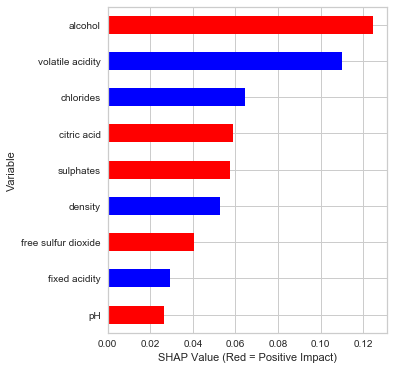

In [27]:
ABS_SHAP(test_shap_values, X_test_)

# Finally, save the model

* Use **Pickle** package to save the trained model.
* To re-load the model, simply loaded_model = pickle.load(open(filename, 'rb'))

In [28]:
# save the model to disk
import pickle
filename = 'wine_quality.pkl'
pickle.dump(model, open(filename, 'wb'))